<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
######################

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [155]:
data = np.loadtxt("data_kmeans.txt")
np.random.shuffle(data)

In [156]:
#function i will use for math 
def indicator(A,B):
  I = 0
  if A == B:
    I = 1
  else:
    I = 0

  return I

# found on stack overflow 
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))


In [157]:
##################
#Definitions#
#  X -> Represengts the Data Input 
#  K -> Represents the # of cluster
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
#  J -> number of centroids which is equal to K
##################
# inialize and standardize the data
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
### compute the distance between each point for each centroid
#### compute the argmin of the distance between each point and each centroid
##### assign each point to the closest centroid
###### update the centroid by computing the barycenter of the point assigned to that centroid

In [158]:
##################
#Definitions#
#  X -> Represengts the Data Input 
X_train = data[:200,:]
X_test = data[200:,:]

#  K -> Represents the # of cluster
K = 3
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
I = 300
I_train = 200
I_test = 100
#  J -> number of centroids which is equal to K
J = K
# N -> number of features
N = 2
# initialize the array which will contain the distance
D = np.zeros((I_train,K))


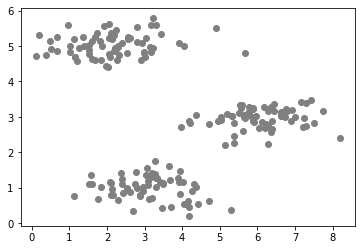

In [159]:
# inialize and standardize the data
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")

In [160]:
print(X_train[120,1])

0.95672


In [161]:
###############################################
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK:

# We will take the min and max value of our data and take random centroid between the min and max of our data coordinate:
max_x = np.max(X_train[:,0])
min_x = np.min(X_train[:,0])

max_y = np.max(X_train[:,1])
min_y = np.min(X_train[:,1])
# we compute mu :
mu_x = [ np.random.uniform(min_x,max_x) for mu in range(J) ] 
mu_y = [ np.random.uniform(min_y,max_y) for mu in range(J) ] 
mu = np.array((mu_x,mu_y)).T
print(mu[0])

[0.82469423 3.21781995]


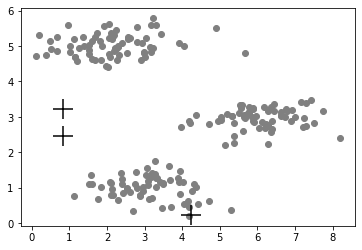

In [162]:
# visualisation:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")

In [163]:
######################################
# compute the distance between each point and each centroid and stock it in a distance array named D using the norm 2 
# D is of dimension I * K because for each point (I point) we have K distance ( one for each centroid)


def distance(I_train,K,mu,X_train,D):
  for i in range(I_train):
    for j in range(K):
        D[i,j] = (X_train[i,0] - mu[j,0])**2 + (X_train[i,1] - mu[j,1])**2

  return D

###### update the centroid by computing the barycenter of the point assigned to that centroid
def update_center(X_train,yes,mu,K,I_train):
  for k in range(K):
     mu[k,0] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,0]) /  sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,1] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,1]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
  return mu


In [169]:

D = distance(I_train,K,mu,X_train,D)
yes = np.argmin(D,axis=1)
update_center(X_train,yes,mu,K,I_train)


array([[2.07877408, 5.03706197],
       [3.0641082 , 1.00811082],
       [6.03102647, 2.94974162]])

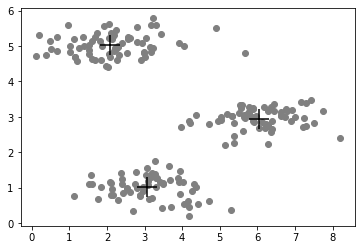

In [170]:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")